# **Documentation and Report**

### Team Members:

Daniel Mark (dmark001@e.ntu.edu.sg), Enzio Dwiputra Sujandi (enzi0001@e.ntu.edu.sg), Chua Wei Kang (wchua054@e.ntu.edu.sg), Chye Rui Teng Reina (RCHYE001@e.ntu.edu.sg), Er Shan Yu (ersh0003@e.ntu.edu.sg)

---
## **Analysis of Data**

- 2759 Males and 3241 Females.
- GPA wise, the students had an average GPA of approximately 4.09
- maximum GPA of 4.97 and minimum GPA of 3.7.
- Total 18 schools

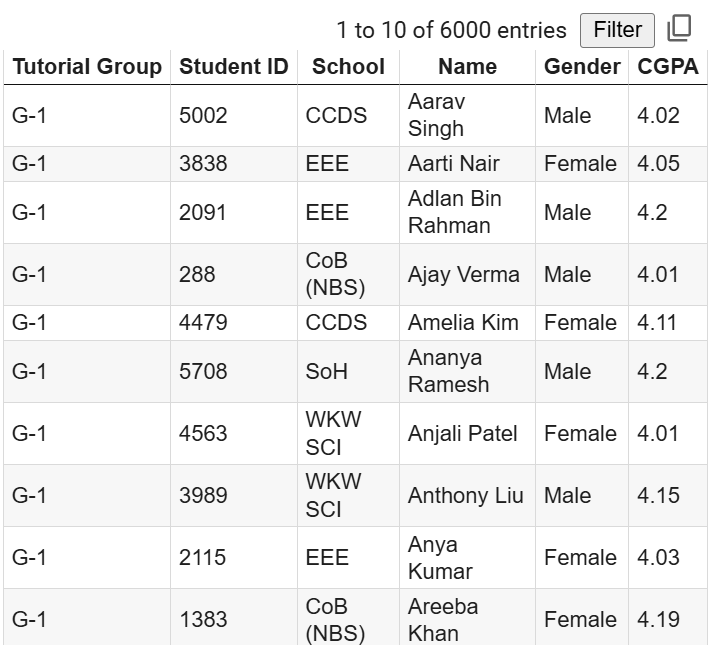![image.png]()
---
## **Problem Decomposition:**

### 1. Data Parsing and Loading



- Read data from records.csv.

- Parse each line to extract details: Tutorial Group, Student ID, School, Name, Gender, CGPA.

- Store each student record in a structured format for further processing.


### 2. Define Team Constraints



- School Diversity: Limit the majority of any school within each team.

- Gender Balance: Ensure that no team has more than three students of the same gender in a team of five.

- CGPA Balance: Avoid teams with only high or only low CGPA students; ensure an acceptable GPA difference within teams.

### 3. Initialize Parameters and Structures



- Define boundaries to manage students in batches by tutorial groups.

- Initialize lists or structures to track team diversity by school, gender, and GPA within each tutorial group.

### 4. Team Formation Logic



Loop through students in the current tutorial group.

For each student:

- Check team constraints (gender, school, and GPA).

- Assign to a suitable team or create a new team if allowed by the constraints.

- Update team attributes after assigning a student.

### 5. Special Cases Handling (Team Limits)

Objective: Manage cases where team limits or constraints prevent immediate assignment.

Requirements:

- If no suitable team is found, identify an existing team with fewer than five members that still meets the constraints.


### 6. Finalizing and Exporting Team Data



- Create a structured list with the assigned teams for each student.

- Save the data to a new CSV file, ensuring it includes the student’s assigned team along with other details.

### 7. Additional Requirements


- Enable an input option for team size (between 4 and 10).

- Adjust the allocation algorithm to accommodate different team sizes while maintaining diversity constraints.


---
## **Flowchart**

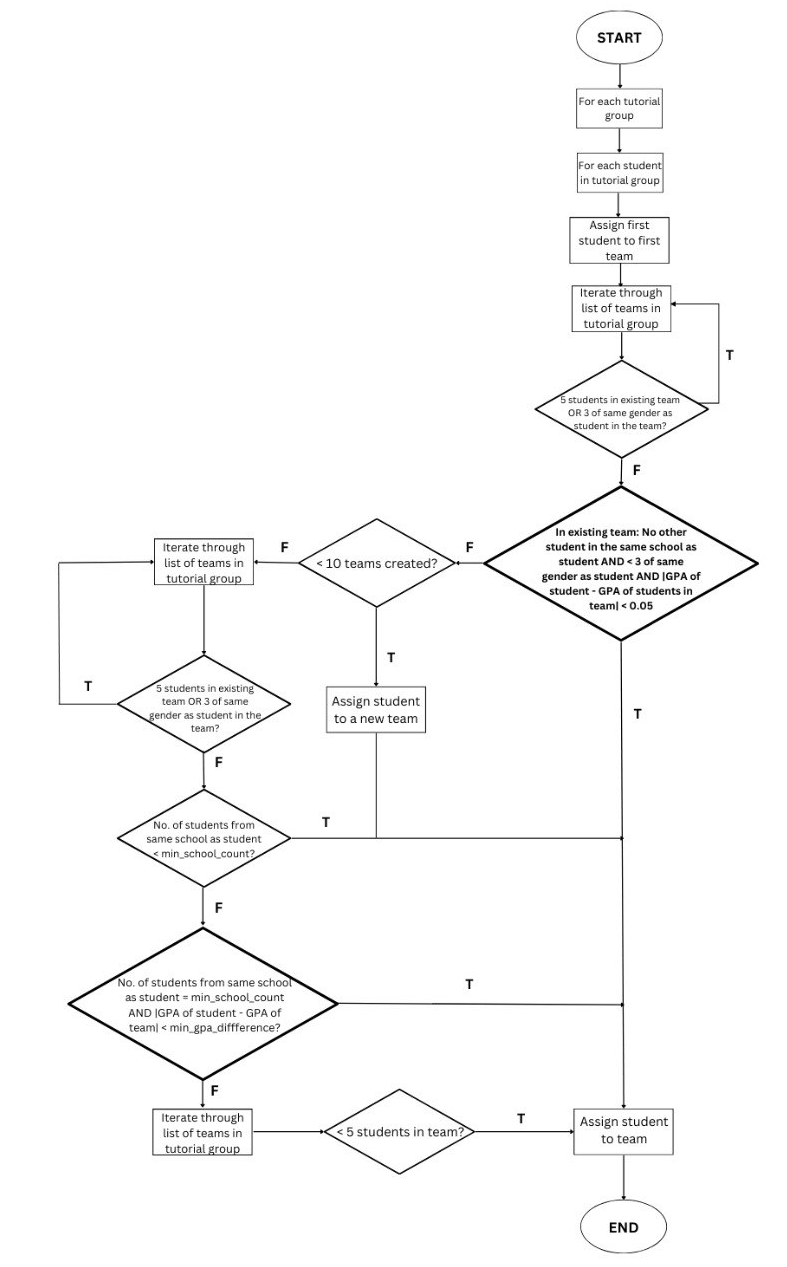

## **Pseudocode:**

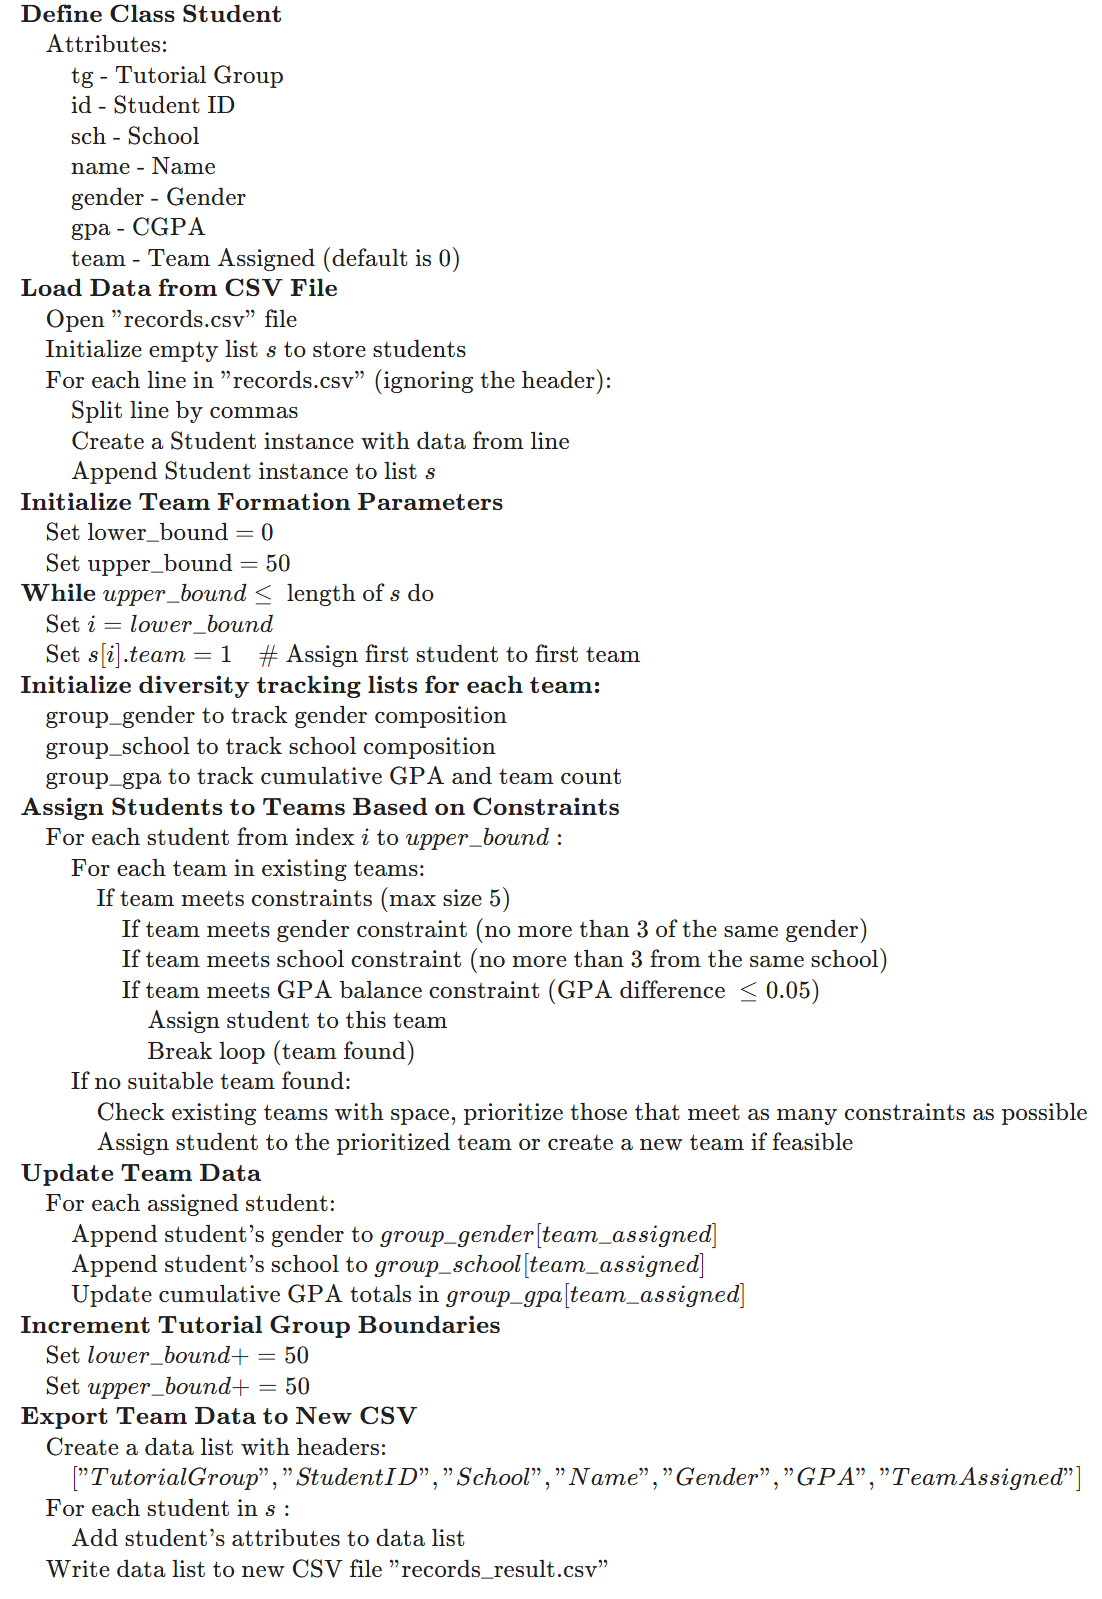


# Code

In [ ]:
import csv
class student:
    def __init__(self, tg, id, sch, name, gender, gpa, team) -> None:
        self.tg = tg
        self.id = id
        self.sch = sch
        self.name = name
        self.gender = gender
        self.gpa = float(gpa)
        self.team = team

In [ ]:
f = open("records.csv", "r")
x = f.read()

lines = x.split('\n')
#lines = ["Tutorial Group,Student ID,School,Name,Gender,CGPA", "G-1,5002,CCDS,Aarav Singh,Male,4.02", "G-1,3838,EEE,Aarti Nair,Female,4.05", ....]
s = []

In [ ]:
for i in lines[1:]:
    if i == '':continue
    temp = i.split(',')
    s.append(student(temp[0], temp[1], temp[2], temp[3], temp[4], temp[5], 0))


In [ ]:
lower_bound = 0
upper_bound = 50

while(upper_bound <= len(s)):
    # Initialize list to track gender, school and cumulative GPA distribution in each team
    i = lower_bound
    s[i].team = 1
    group_gender = [[]]
    group_school = [[]]
    group_gpa = [[]]

    # Add the first student's details to the first team
    group_gender[0].append(s[i].gender)
    group_school[0].append(s[i].sch)
    group_gpa[0].append(s[i].gpa)
    group_gpa[0].append(1)

    i += 1

    # Loop through the remaining students in the current batch (up to upper_bound)
    while (i < upper_bound):
        team_assigned = -1 # Initialize team assignment as unassigned (-1)

        for j in range(len(group_school)):
            if (len(group_school[j]) == 5):
                continue

            if (group_gender[j].count(s[i].gender) > 3): # Skip teams that would exceed the gender ratio (no more than 3 of the same gender)
                continue

            if (s[i].sch not in group_school[j]):
                if (group_gender[j].count(s[i].gender) < 3 and abs(s[i].gpa - (group_gpa[j][0] / group_gpa[j][1])) > 0.05):
                    team_assigned = j
                    break # Break out of the loop if we already find the "best" team for the i th person

         # Assign the student to a team if not yet assigned
        if team_assigned == -1:
            team_assigned = len(group_school)  # Assign the student to a new team

            if team_assigned >= 10:  # If there are already 10 teams, find the most suitable existing team
                min_school_count = 5
                min_gpa_difference = 5

                # Iterate over each existing team to find the best fit
                for team_index in range(len(group_school)):

                    # Skip if the team already has 5 members
                    if len(group_school[team_index]) == 5:
                        continue

                    # Skip if adding this student would exceed the gender ratio
                    if group_gender[team_index].count(s[i].gender) > 3:
                        continue

                    # Prioritize teams with the fewest students from the same school
                    school_count = group_school[team_index].count(s[i].sch)

                    if school_count < min_school_count:
                        min_school_count = school_count
                        min_gpa_difference = abs(s[i].gpa - group_gpa[team_index][0] / group_gpa[team_index][1])
                        team_assigned = team_index

                    # If the number of students from the same school is the same, prioritize by GPA difference
                    elif school_count == min_school_count:
                        gpa_difference = abs(s[i].gpa - group_gpa[team_index][0] / group_gpa[team_index][1])

                        if gpa_difference < min_gpa_difference:
                            min_gpa_difference = gpa_difference
                            team_assigned = team_index

                    # Base case to ensure the student is assigned to a team if no suitable team is found
                    if team_assigned == -1:
                        team_assigned = team_index

            if team_assigned == len(group_school):  # No suitable team found, need to reassign
                for team_index in range(len(group_school)):
                    if len(group_school[team_index]) < 5:  # Find a team with fewer than 5 members
                        team_assigned = team_index
                        break  # Assign the student to this team and break out of the loop

            if(team_assigned == len(group_school) and len(group_school) < 10): # If the i th person is being allocated to a new team then
                group_school.append([]) # Append a new "team" to the group school, gender, and gpa
                group_gender.append([])
                group_gpa.append([0, 0])

        s[i].team = team_assigned + 1

        group_gender[team_assigned].append(s[i].gender)
        group_school[team_assigned].append(s[i].sch)
        group_gpa[team_assigned][0] += s[i].gpa
        group_gpa[team_assigned][1] += 1
        i += 1 # Move to the next student


    # Move to the next tutorial group of 50 students
    upper_bound += 50
    lower_bound += 50

In [ ]:
data = [["Tutorial Group", "Student ID", "School", "Name", "Gender", "GPA", "Team Assigned"]] #Tutorial Group,Student ID,School,Name,Gender,CGPA
for i in s:
    data.append([i.tg, i.id, i.sch, i.name, i.gender, i.gpa, i.team])

In [ ]:
# Creating csv file
with open('records_result.csv', 'w', newline ='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

## Data Visualization

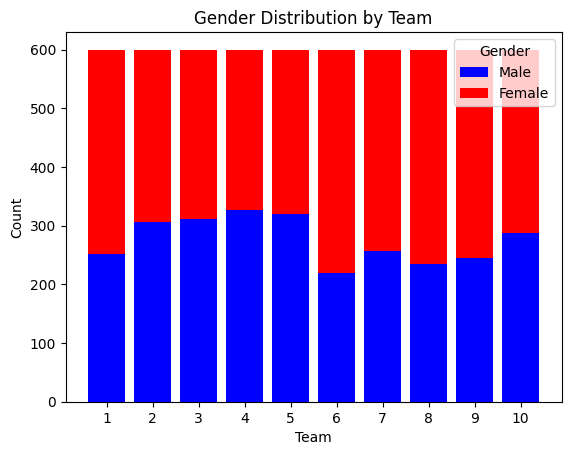

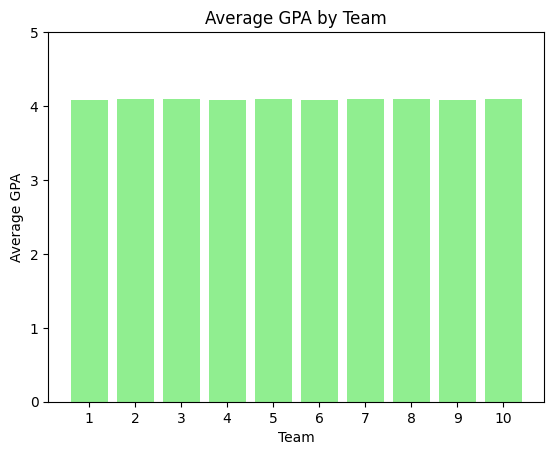

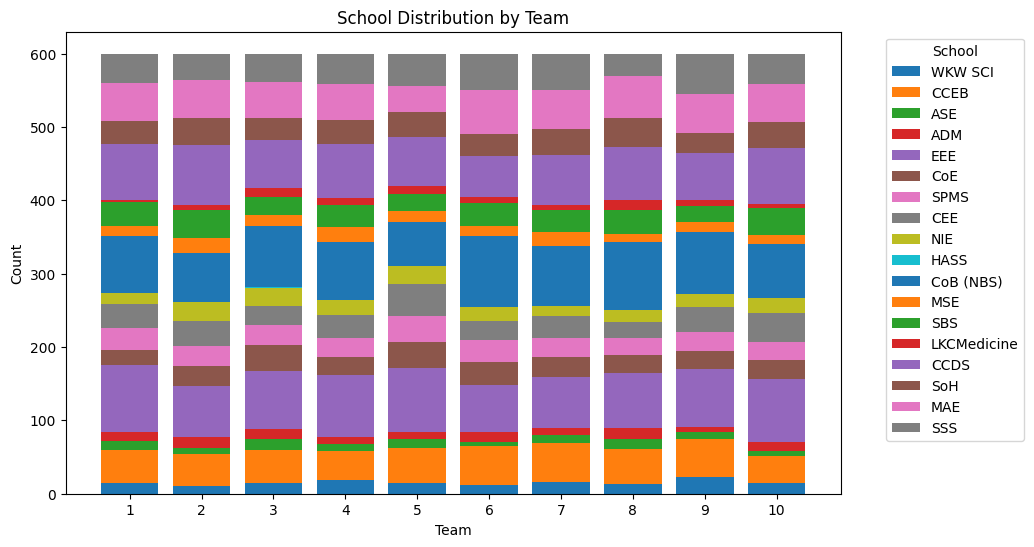

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

#read CSV data from file
with open("records_result.csv", "r") as file:
    lines = file.readlines()

# Parse headers and rows
headers = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

# Map headers to their indices
team_idx = headers.index("Team Assigned")
gender_idx = headers.index("Gender")
gpa_idx = headers.index("GPA")
school_idx = headers.index("School")

# Gender Distribution by Team
gender_counts = defaultdict(lambda: defaultdict(int))
for row in data:
    team = row[team_idx]
    gender = row[gender_idx]
    gender_counts[team][gender] += 1

teams = list(gender_counts.keys())
male_counts = [gender_counts[team].get("Male", 0) for team in teams]
female_counts = [gender_counts[team].get("Female", 0) for team in teams]

# Plot Gender Distribution by Team
plt.bar(teams, male_counts, label="Male", color="blue")
plt.bar(teams, female_counts, bottom=male_counts, label="Female", color="red")
plt.title('Gender Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


# GPA Distribution by Team
gpa_totals = {}
gpa_counts = {}

for row in data:
    team = row[team_idx]
    gpa = float(row[gpa_idx])

    if team not in gpa_totals:
        gpa_totals[team] = 0
        gpa_counts[team] = 0

    gpa_totals[team] += gpa
    gpa_counts[team] += 1

avg_gpa = {team: gpa_totals[team] / gpa_counts[team] for team in gpa_totals}

plt.bar(avg_gpa.keys(), avg_gpa.values(), color="lightgreen")
plt.title('Average GPA by Team')
plt.xlabel('Team')
plt.ylim(0, 5)
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.show()

# School Distribution by Team
school_counts = defaultdict(lambda: defaultdict(int))
for row in data:
    team = row[team_idx]
    school = row[school_idx]
    school_counts[team][school] += 1

# Plot School Distribution by Team
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = [0] * len(teams)
for school in set(school for team in school_counts.values() for school in team):
    counts = [school_counts[team].get(school, 0) for team in teams]
    ax.bar(teams, counts, bottom=bottoms, label=school)
    bottoms = [bottoms[i] + counts[i] for i in range(len(counts))]

plt.title('School Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


Note: "best" team criteria: there are no 2 students with the same school, the gender ratio is 2:3, and the difference of the gpa average and each person is about 0.05

# Enhanced (Additional Requirement)
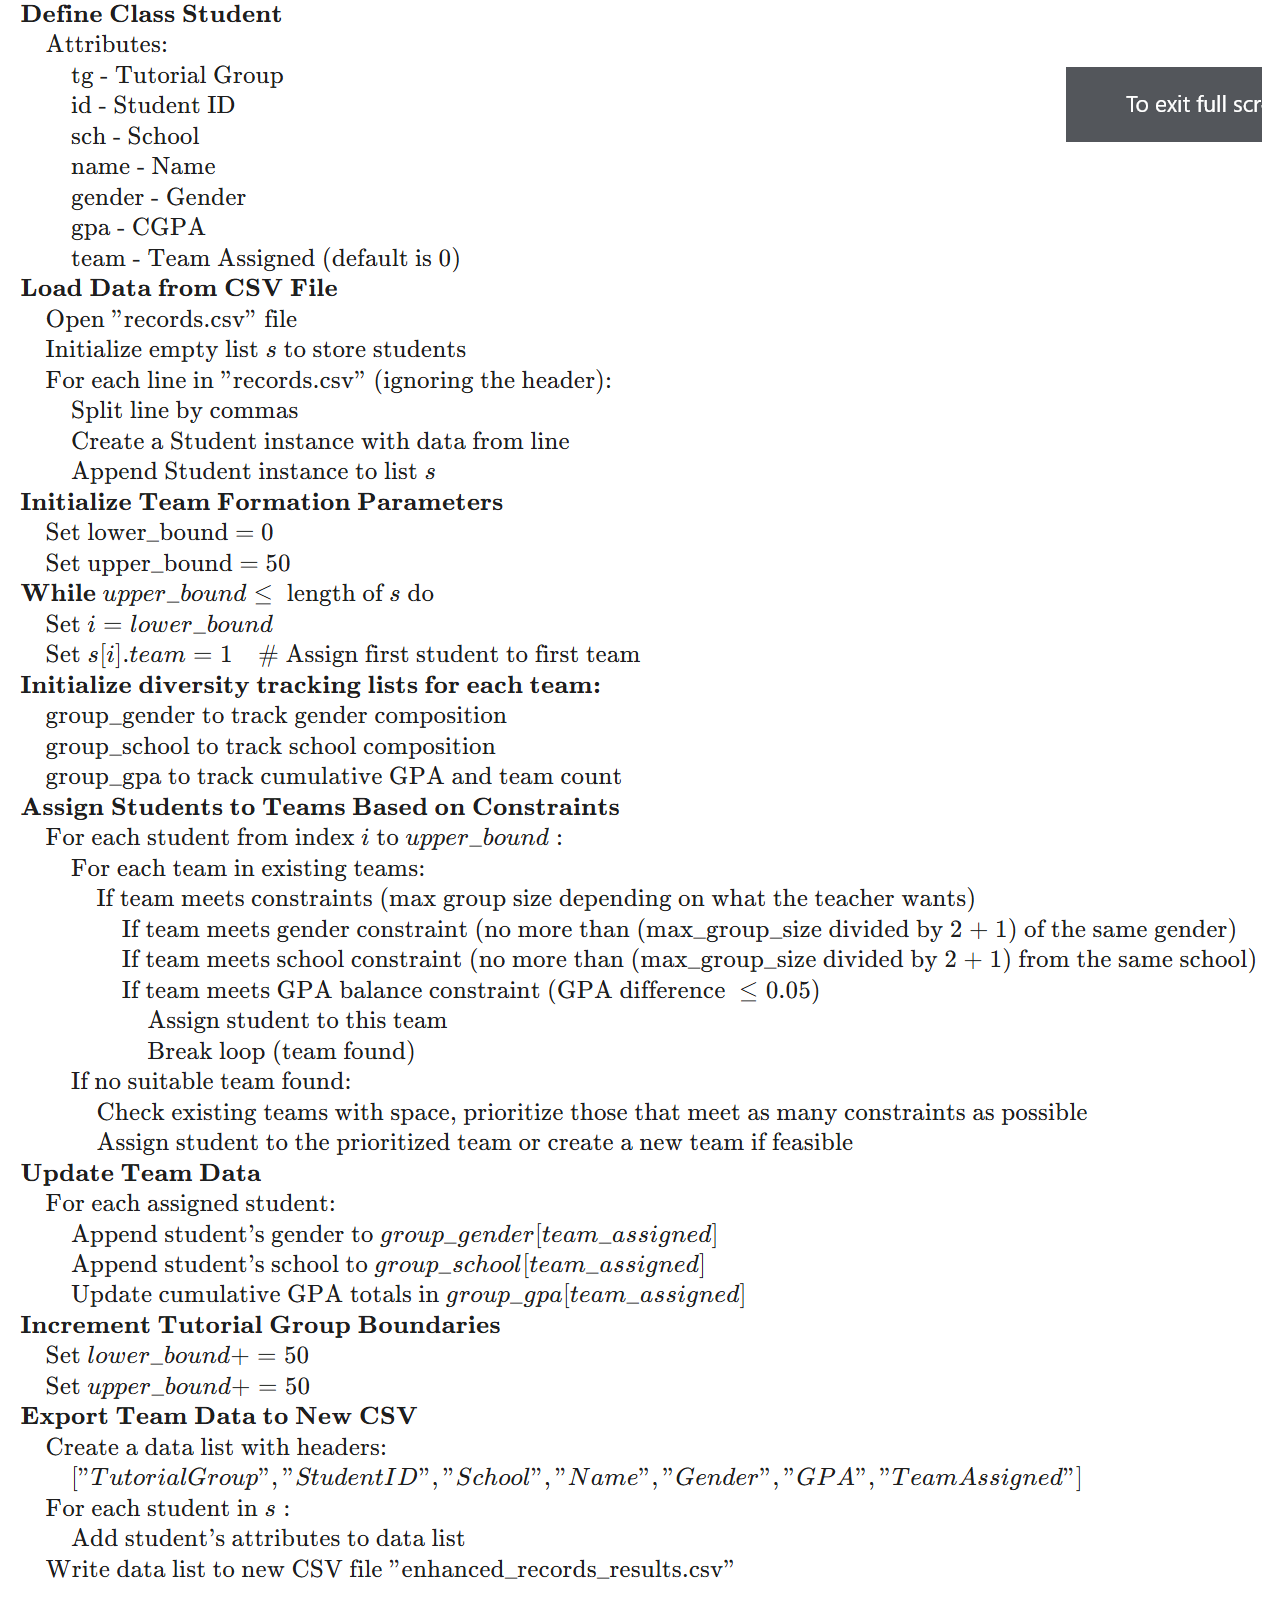

In [ ]:
try:
    max_group_size = int(input("Enter the desired number of students per group (4 - 10): "))
    if 4 <= max_group_size <= 10:
        print("The number of students per group is set to", max_group_size)
        pass
    else:
        print("Please enter a valid number between 4 and 10.")
        max_group_size = int(input("Enter the desired number of students per group (4 - 10):"))
except ValueError:
    print("Invalid input. Please enter a valid number between 4 and 10.")
    max_group_size = int(input("Enter the desired number of students per group (4 - 10):"))



Enter the desired number of students per group (4 - 10): 10
The number of students per group is set to 10


In [ ]:
import csv
class student:
    #Class called 'student' that have these attributes: tutorial_group(tg), id(id), etc
    def __init__(self, tg, id, sch, name, gender, gpa, team) -> None:
        self.tg = tg
        self.id = id
        self.sch = sch
        self.name = name
        self.gender = gender
        self.gpa = float(gpa)
        self.team = team

In [ ]:
#opens the csv file
f = open("records.csv", "r")
x = f.read()
# Separate each line into an element in a list
lines = x.split('\n')
#lines = ["Tutorial Group,Student ID,School,Name,Gender,CGPA", "G-1,5002,CCDS,Aarav Singh,Male,4.02", "G-1,3838,EEE,Aarti Nair,Female,4.05", ....]
s = []

In [ ]:
for i in lines[1:]:
    if i == '':continue
    temp = i.split(',') #example the 1st element: temp = ["G-1", "5002", "CCDS", "Aarav Singh", "Male", "4.02"]
    s.append(student(temp[0], temp[1], temp[2], temp[3], temp[4], temp[5], 0))
    #appending each student data using data type of 'student' class into the list
    #so now the list would look something like: s = [student("G-1", "5002"...), student("G-1", "3838"....), ....]

In [ ]:
lower_bound = 0
upper_bound = 50

while(upper_bound <= len(s)):

    i = lower_bound
    s[i].team = 1
    group_gender = [[]]
    group_school = [[]]
    group_gpa = [[]]

    group_gender[0].append(s[i].gender)
    group_school[0].append(s[i].sch)
    group_gpa[0].append(s[i].gpa)
    group_gpa[0].append(1)

    i += 1
    while (i < upper_bound):
        team_assigned = -1
        for j in range(len(group_school)):

            # Using `max_group_size` variable to dynamically set the maximum team size and gender ratio limits
            if (len(group_school[j]) == max_group_size):
                continue
            # Enforce the gender ratio, ensures that teams stay balanced by gender using `max_group_size // 2 + 1`
            if (group_gender[j].count(s[i].gender) > (max_group_size//2 + 1)):
                continue

            if (s[i].sch not in group_school[j]):
                if (group_gender[j].count(s[i].gender) < (max_group_size//2 + 1) and abs(s[i].gpa - (group_gpa[j][0] / group_gpa[j][1])) > 0.05):
                    team_assigned = j
                    break

        if team_assigned == -1:
            team_assigned = len(group_school)
            if team_assigned >= (50 // max_group_size):
                min_school_count = max_group_size
                min_gpa_difference = max_group_size

                for team_index in range(len(group_school)):

                    # Using `max_group_size` variable to dynamically set the maximum team size and gender ratio limits
                    if len(group_school[team_index]) == max_group_size:
                        continue

                    if group_gender[team_index].count(s[i].gender) > (max_group_size // 2 + 1):
                        continue

                    school_count = group_school[team_index].count(s[i].sch)
                    if school_count < min_school_count:
                        min_school_count = school_count
                        min_gpa_difference = abs(s[i].gpa - group_gpa[team_index][0] / group_gpa[team_index][1])
                        team_assigned = team_index

                    elif school_count == min_school_count:
                        gpa_difference = abs(s[i].gpa - group_gpa[team_index][0] / group_gpa[team_index][1])
                        if gpa_difference < min_gpa_difference:
                            min_gpa_difference = gpa_difference
                            team_assigned = team_index

                    if team_assigned == -1:
                        team_assigned = team_index


            # Assign remaining students if any are left without a team
            # This will handle cases like 50/6 where 2 students may be left unassigned
            if team_assigned == (50 // max_group_size):
                for team_index in range(len(group_school)):
                    if len(group_school[team_index]) <= max_group_size:
                        team_assigned = team_index
                        break

            if(team_assigned == len(group_school) and len(group_school) < (50 // max_group_size)):
                group_school.append([])
                group_gender.append([])
                group_gpa.append([0, 0])

        s[i].team = team_assigned + 1

        # Avoiding 'index out of range' errors, dynamically expanding the list
        while len(group_gender) <= team_assigned:
            group_gender.append([])
        while len(group_school) <= team_assigned:
            group_school.append([])
        while len(group_gpa) <= team_assigned:
            group_gpa.append([0, 0])

        group_gender[team_assigned].append(s[i].gender)
        group_school[team_assigned].append(s[i].sch)
        group_gpa[team_assigned][0] += s[i].gpa
        group_gpa[team_assigned][1] += 1
        i += 1


    upper_bound += 50
    lower_bound += 50

In [ ]:
data = [["Tutorial Group", "Student ID", "School", "Name", "Gender", "GPA", "Team Assigned"]] #Tutorial Group,Student ID,School,Name,Gender,CGPA
for i in s:
    data.append([i.tg, i.id, i.sch, i.name, i.gender, i.gpa, i.team])

In [ ]:
#creating csv file
with open('enhanced_records_result.csv', 'w', newline ='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

Note: "best" team criteria: there are no int(max_group_size / group_school) students with the same school, the gender ratio is (max_group_size //2) : (max_group_size//2 + 1), and the difference of the gpa average and each person is about 0.05 (obtained through standard deviation)

## **Data Visualization for Additional Requirement**

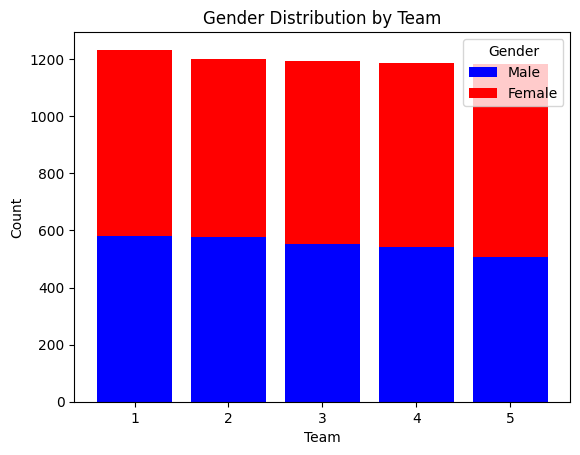

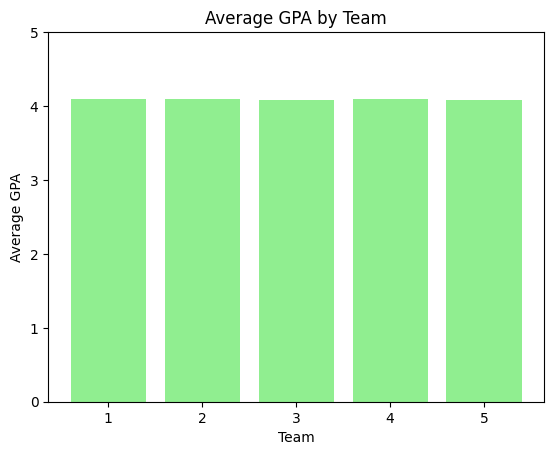

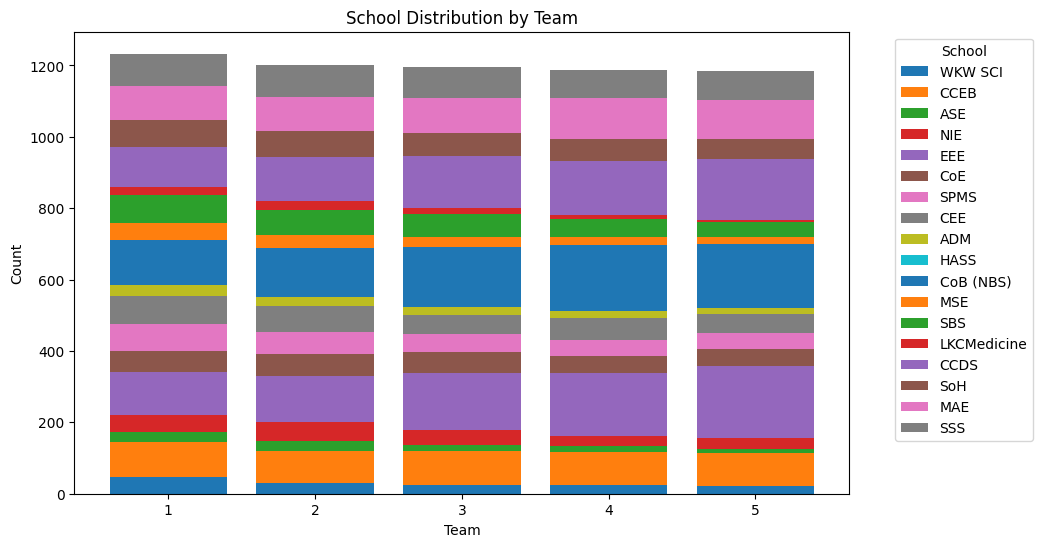

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

#read CSV data from file
with open("enhanced_records_result.csv", "r") as file:
    lines = file.readlines()

# Parse headers and rows
headers = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

# Map headers to their indices
team_idx = headers.index("Team Assigned")
gender_idx = headers.index("Gender")
gpa_idx = headers.index("GPA")
school_idx = headers.index("School")

# Gender Distribution by Team
gender_counts = defaultdict(lambda: defaultdict(int))
for row in data:
    team = row[team_idx]
    gender = row[gender_idx]
    gender_counts[team][gender] += 1

teams = list(gender_counts.keys())
male_counts = [gender_counts[team].get("Male", 0) for team in teams]
female_counts = [gender_counts[team].get("Female", 0) for team in teams]

# Plot Gender Distribution by Team
plt.bar(teams, male_counts, label="Male", color="blue")
plt.bar(teams, female_counts, bottom=male_counts, label="Female", color="red")
plt.title('Gender Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


# GPA Distribution by Team
gpa_totals = {}
gpa_counts = {}

for row in data:
    team = row[team_idx]
    gpa = float(row[gpa_idx])

    if team not in gpa_totals:
        gpa_totals[team] = 0
        gpa_counts[team] = 0

    gpa_totals[team] += gpa
    gpa_counts[team] += 1

avg_gpa = {team: gpa_totals[team] / gpa_counts[team] for team in gpa_totals}

plt.bar(avg_gpa.keys(), avg_gpa.values(), color="lightgreen")
plt.title('Average GPA by Team')
plt.xlabel('Team')
plt.ylim(0, 5)
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.show()

# School Distribution by Team
school_counts = defaultdict(lambda: defaultdict(int))
for row in data:
    team = row[team_idx]
    school = row[school_idx]
    school_counts[team][school] += 1

# Plot School Distribution by Team
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = [0] * len(teams)
for school in set(school for team in school_counts.values() for school in team):
    counts = [school_counts[team].get(school, 0) for team in teams]
    ax.bar(teams, counts, bottom=bottoms, label=school)
    bottoms = [bottoms[i] + counts[i] for i in range(len(counts))]

plt.title('School Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


## **Challenges and Issues:**

- Deciding on the best algorithm to use was difficult, considering various factors like school, GPA, and gender in the priority order.

- Limitation of not using built-in functions (like those in pandas), which limited efficiency and required more manual coding.

- "index out of range" errors due to list boundaries not being properly managed.

- Syntax errors occurred frequently, mostly due to small mistakes in indexing or condition checks.

- For the enhanced part, if the max_group_size does not evenly divides the total group size (50), it is hard to divide the rest of the members

## **Conclusion:**



- The greedy heuristic approach with a focus on GPA first is effective for creating balanced teams, since GPA is the hardest to handle.
- Prioritizing GPA over school diversity helps maintain similar academic performance across teams, which promotes fairness and effective collaboration.
- A practical solution that achieves both academic balance and diversity, which makes it ideal for scenarios where team performance depends on a balanced skill level.

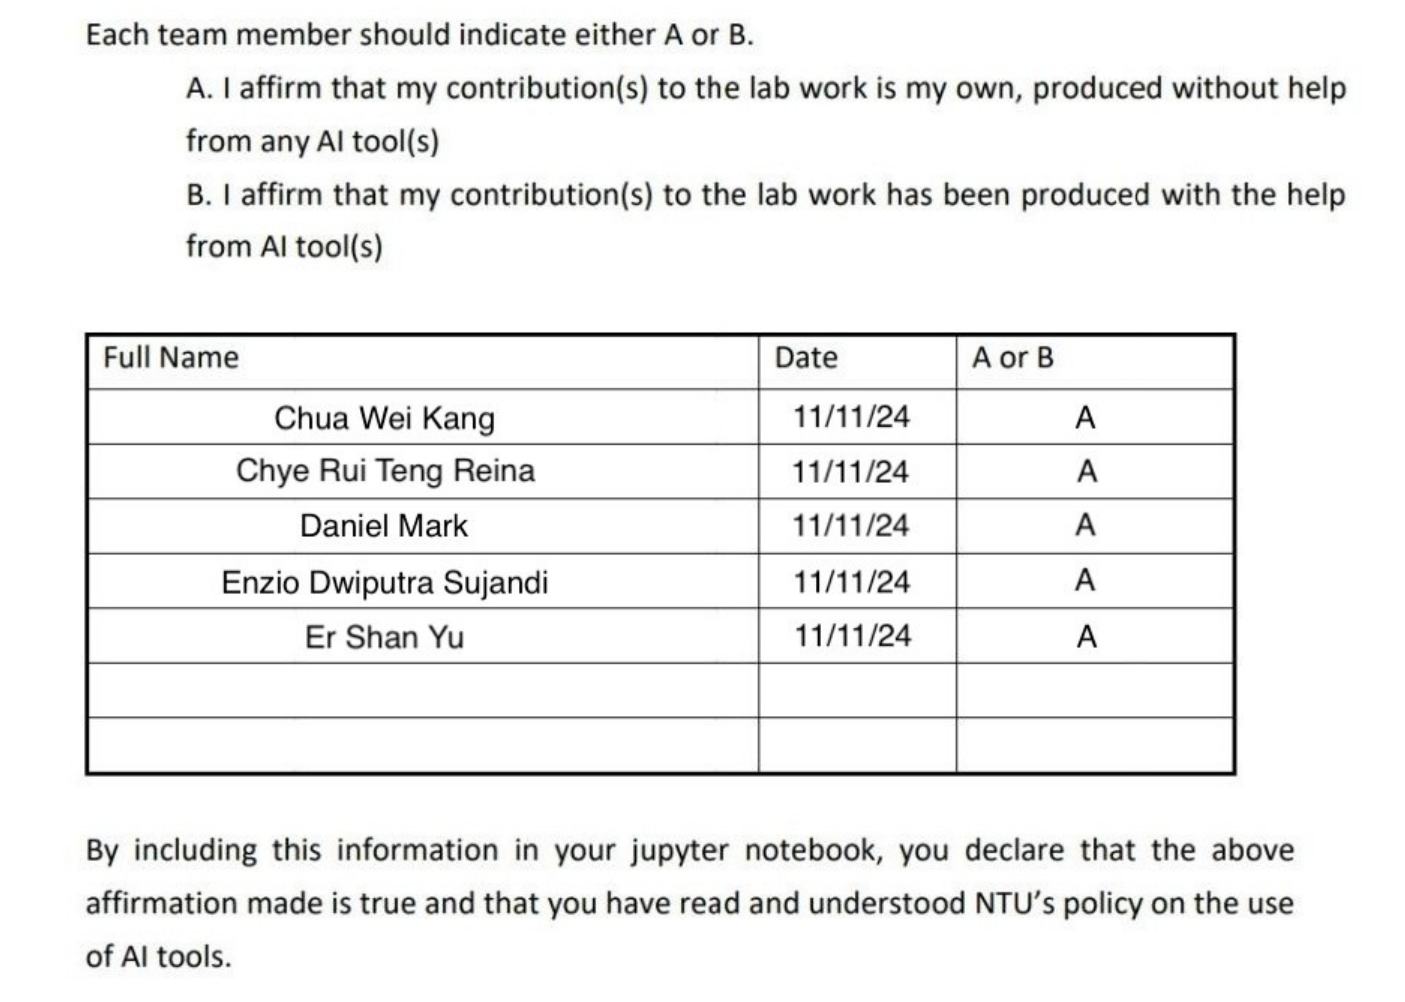